## Assumptions

1. Subject will reach points at event seconds
2. Speed is adjusted if points limit velocity and acceleration

A smoothing filter is applied to identify points where the route turn is beyond a threshold. This creates a constraint for where output points will be to create smooth animation.

## Algorithm

1. Given a list of locations on a route $polyline$
2. Create a $smoothRoute = smooth(polyline)$ where every location is changing route direction by $SmoothRouteThreshold$
3. Create a $speedGraph$ where locations and roads have a speed, roads have max and locations have a minimum
4. Interpolate each location to location with 1/s connection locations

### Constraints
- $SmoothRouteThreshold$ Maximum direction change between two points
- $SpeedGraph$ Every point and edge has a desired speed

### Equations

EDIT: these all changed after hacking

Calculate the accelaration

- Accelera iteration $a(t)=min(MAX_A, MAX_V-v(t-1))$
- Accelera iteration $a(t)=MAX_A$ if $d(t)*v(t) < D$
- Decelera iteration $a(t)=MIN_A$ if $d(t)*v(t) > D$
- Constant iteration $a(t)=0$ if $v(t) == MAX_V$

Update the subject

- Velocity iteration $v(t)=v(t-1)+a(t)$
- Position iteration $p(t)=p(t-1)+\frac{v(t) + v(t-1)}{2\Delta{t}}$
- Distance iteration $d(t)=D-p(t)$

In [13]:
def distanceToStop(velocity, acceleration):
    distanceToStop = velocity
    while (velocity > 0):
        velocityNext = velocity + acceleration
        distanceToStop += (velocity + velocityNext) / 2.0
        velocity = velocityNext
    return distanceToStop

stoppingDistance:12.0 remainingDistance:80.86 slowDownFactor:0.14840465001236705
stoppingDistance:14.5 remainingDistance:74.36 slowDownFactor:0.19499731038192578
stoppingDistance:22.5 remainingDistance:66.36 slowDownFactor:0.33905967450271246
stoppingDistance:36.0 remainingDistance:55.86 slowDownFactor:0.644468313641246
stoppingDistance:58.0 remainingDistance:41.86 slowDownFactor:1.385570950788342
stoppingDistance:40.5 remainingDistance:27.36 slowDownFactor:1.480263157894737
stoppingDistance:26.0 remainingDistance:15.86 slowDownFactor:1.639344262295082
stoppingDistance:14.5 remainingDistance:7.359999999999999 slowDownFactor:1.970108695652174
stoppingDistance:6.0 remainingDistance:1.8599999999999994 slowDownFactor:3.2258064516129044


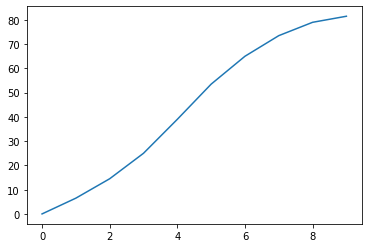

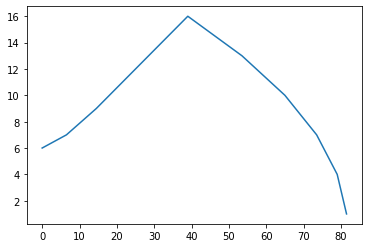

t:0	a:0	v:6	p:0
t:1	a:1	v:7	p:6.5
t:2	a:2	v:9	p:14.5
t:3	a:3	v:12	p:25.0
t:4	a:4	v:16	p:39.0
t:5	a:-3	v:13	p:53.5
t:6	a:-3	v:10	p:65.0
t:7	a:-3	v:7	p:73.5
t:8	a:-3	v:4	p:79.0
t:9	a:-3	v:1	p:81.5


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# input with all units the same
# keep integers
distance = 80.86
maxAcceleration = 4
minAcceleration = -3
maxVelocity = 27


endVelocity = 0
t = [0]
a = [0]
v = [6]
p = [0]
for i in range(1, 2000):
    # Remaining distance
    remainingDistance = distance - p[i-1]
    if (remainingDistance <= 0):
        break
    t.append(i)
    
    # Calculate acceleration
    aNow = min(a[i-1]+1, maxAcceleration)
    if (v[i-1] == maxVelocity):
        aNow = 0
    elif (v[i-1] > maxVelocity):
        aNow = -1
    
    stoppingDistance = distanceToStop(v[i-1], minAcceleration)
    slowDownFactor = stoppingDistance / remainingDistance
    if (slowDownFactor*slowDownFactor > 0.70):
        aNow = 0
        
    print("stoppingDistance:%s remainingDistance:%s slowDownFactor:%s" %(stoppingDistance, remainingDistance, slowDownFactor))
    if (stoppingDistance >= remainingDistance):
        aNow = minAcceleration
        
    if (v[i-1] + aNow < endVelocity):
        aNow = max(aNow+1, 0)
    
    a.append(aNow)
     
    # Calculate speed
    v.append(v[i-1] + a[i])
    
    # Calculate position
    pDelta = (v[i] + v[i-1]) / 2.0
    p.append(p[i-1] + pDelta)
    
    
plt.plot(t, p)
plt.show()

plt.plot(p, v)
plt.show()

zipped = zip(t, a, v, p)
for values in zipped: 
    print ("t:%s\ta:%s\tv:%s\tp:%s" %(values[0], values[1], values[2], values[3])) 